In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

In [2]:
operation_type = "rent"
date_or_unioned = "unioned"

In [3]:
file_name = f"{date_or_unioned}-lisbon-listings-for-{operation_type}.csv"

In [4]:
df = pd.read_csv(f'../data/cleaned/{file_name}', index_col='propertyCode')

In [5]:
freguesias_lisboa = [
    "Ajuda",
    "Alcântara",
    "Alvalade",
    "Areeiro",
    "Arroios",
    "Avenidas Novas",
    "Beato",
    "Belém",
    "Benfica",
    "Campo de Ourique",
    "Campolide",
    "Carnide",
    "Estrela",
    "Lumiar",
    "Marvila",
    "Misericórdia",
    "Olivais",
    "Parque das Nações",
    "Penha de França",
    "Santa Clara",
    "Santa Maria Maior",
    "Santo António",
    "São Domingos de Benfica",
    "São Vicente"
]

In [6]:
freguesias_grouped = {
    "Group A: Luxury and Central Areas": [
        "Ajuda",
        "Avenidas Novas",
        "Campo de Ourique",
        "Misericórdia",
        "Santa Maria Maior",
        "Santo António",
        "Estrela"
    ],
    "Group B: Mid-Range and Family-Oriented Areas": [
        "Alvalade",
        "Areeiro",
        "Arroios",
        "Campolide",
        "São Domingos de Benfica",
        "Benfica",
        "Carnide"
    ],
    "Group C: Affordable and Emerging Areas": [
        "Alcântara",
        "Beato",
        "Marvila",
        "Santa Clara",
        "Olivais",
        "Penha de França"
    ],
    "Group D: Modern and Urbanized Areas": [
        "Belém",
        "Parque das Nações",
        "Lumiar"
    ]
}

In [7]:
# Create a reverse mapping of freguesia to group
freguesia_to_group = {}
for group, freguesias in freguesias_grouped.items():
    for freguesia in freguesias:
        freguesia_to_group[freguesia] = group
freguesia_to_group

{'Ajuda': 'Group A: Luxury and Central Areas',
 'Avenidas Novas': 'Group A: Luxury and Central Areas',
 'Campo de Ourique': 'Group A: Luxury and Central Areas',
 'Misericórdia': 'Group A: Luxury and Central Areas',
 'Santa Maria Maior': 'Group A: Luxury and Central Areas',
 'Santo António': 'Group A: Luxury and Central Areas',
 'Estrela': 'Group A: Luxury and Central Areas',
 'Alvalade': 'Group B: Mid-Range and Family-Oriented Areas',
 'Areeiro': 'Group B: Mid-Range and Family-Oriented Areas',
 'Arroios': 'Group B: Mid-Range and Family-Oriented Areas',
 'Campolide': 'Group B: Mid-Range and Family-Oriented Areas',
 'São Domingos de Benfica': 'Group B: Mid-Range and Family-Oriented Areas',
 'Benfica': 'Group B: Mid-Range and Family-Oriented Areas',
 'Carnide': 'Group B: Mid-Range and Family-Oriented Areas',
 'Alcântara': 'Group C: Affordable and Emerging Areas',
 'Beato': 'Group C: Affordable and Emerging Areas',
 'Marvila': 'Group C: Affordable and Emerging Areas',
 'Santa Clara': 'Grou

In [8]:
df = df[df['municipality'].isin(freguesias_lisboa)]

In [9]:
df.head()

floor   price propertyType   size  rooms  bathrooms  \
propertyCode                                                        
33894210        NaN  1620.0         flat  153.0      5          2   
33513874        2.0  2700.0         flat  102.0      2          2   
33893664        NaN  1000.0         flat   55.0      1          1   
33893658        NaN  1000.0         flat   55.0      1          1   
33893592        NaN  1000.0         flat   55.0      1          1   

                        address province  municipality              district  \
propertyCode                                                                   
33894210      Saldanha - Picoas   Lisboa       Arroios  São Jorge de Arroios   
33513874      Doca de Alcântara   Lisboa       Estrela     Doca de Alcântara   
33893664                   Bica   Lisboa  Misericórdia                  Bica   
33893658                   Bica   Lisboa  Misericórdia                  Bica   
33893592                   Bica   Lisboa  Misericórdia                  Bica   

              ... newDevelopment hasLift  priceByArea  topNewDevelopment  \
propertyCode  ...                                                          
33894210      ...          False   False         11.0              False   
33513874      ...          False    True         26.0              False   
33893664      ...          False   False         18.0              False   
33893658      ...          False   False         18.0              False   
33893592      ...          False   False         18.0              False   

              topPlus newDevelopmentFinished  formerPrice priceChange  \
propertyCode                                                            
33894210        False                    NaN       1620.0         0.0   
33513874        False                    NaN       2700.0         0.0   
33893664        False                    NaN       1000.0         0.0   
33893658        False                    NaN       1000.0         0.0   
33893592        False                    NaN       1000.0         0.0   

             hasParkingSpace  isParkingSpaceIncludedInPrice  
propertyCode                                                 
33894210               False                          False  
33513874               False                          False  
33893664               False                          False  
33893658               False                          False  
33893592               False                          False  

[5 rows x 29 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 33894210 to 33896459
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   floor                          1003 non-null   float64
 1   price                          1733 non-null   float64
 2   propertyType                   1733 non-null   object 
 3   size                           1733 non-null   float64
 4   rooms                          1733 non-null   int64  
 5   bathrooms                      1733 non-null   int64  
 6   address                        1733 non-null   object 
 7   province                       1733 non-null   object 
 8   municipality                   1733 non-null   object 
 9   district                       1660 non-null   object 
 10  country                        1733 non-null   object 
 11  neighborhood                   78 non-null     object 
 12  latitude                       1733 non-nu

In [11]:
df.describe()

floor        price         size        rooms    bathrooms  \
count  1003.000000  1733.000000  1733.000000  1733.000000  1733.000000   
mean      2.660020  1976.465089    85.094057     1.800346     1.457588   
std       2.449707   792.485471    39.657670     1.006595     0.631237   
min      -1.000000   600.000000    12.000000     0.000000     1.000000   
25%       1.000000  1400.000000    55.000000     1.000000     1.000000   
50%       2.000000  1800.000000    76.000000     2.000000     1.000000   
75%       4.000000  2350.000000   110.000000     2.000000     2.000000   
max      17.000000  4692.000000   227.000000     6.000000     3.000000   

          latitude    longitude     distance  priceByArea  formerPrice  \
count  1733.000000  1733.000000  1497.000000  1733.000000  1733.000000   
mean     38.728818    -9.150728  2872.845023    26.735141  1995.214657   
std       0.020166     0.024483  1570.743100    16.153483   797.797586   
min      38.694237    -9.226113    32.000000     7.000000   600.000000   
25%      38.712404    -9.164648  1737.000000    18.000000  1400.000000   
50%      38.724444    -9.148325  2686.000000    23.000000  1800.000000   
75%      38.742622    -9.134425  3512.000000    30.000000  2380.000000   
max      38.793636    -9.092006  8546.000000   308.000000  5000.000000   

       priceChange  
count  1733.000000  
mean     18.749567  
std      75.668786  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1000.000000

<Axes: xlabel='price'>

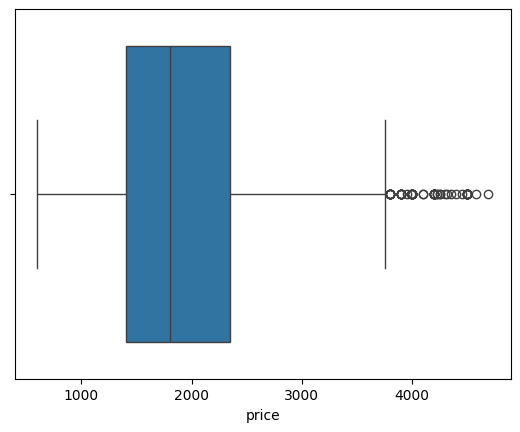

In [12]:
sns.boxplot(x=df['price'])

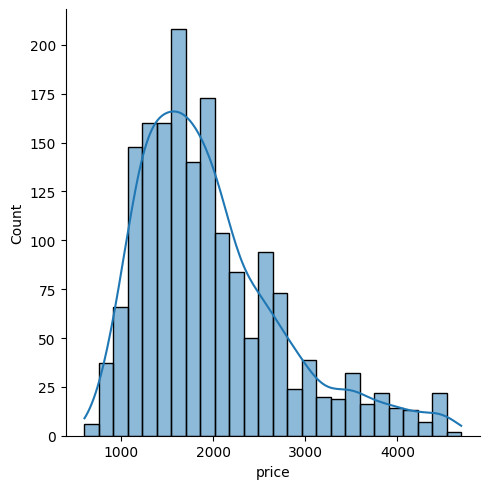

In [13]:
sns.displot(df['price'], kde=True)

In [14]:
df['logPrice'] = np.log(df['price'])

<Axes: xlabel='logPrice'>

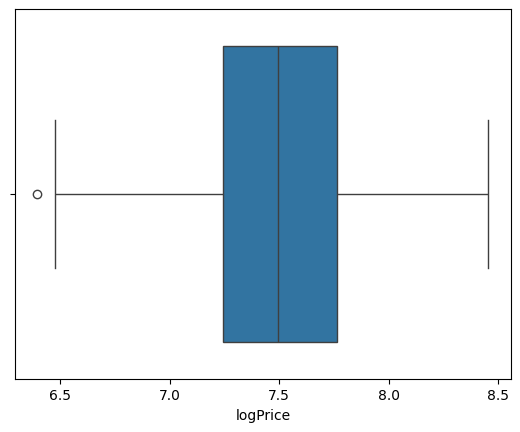

In [15]:
sns.boxplot(x=df['logPrice'])

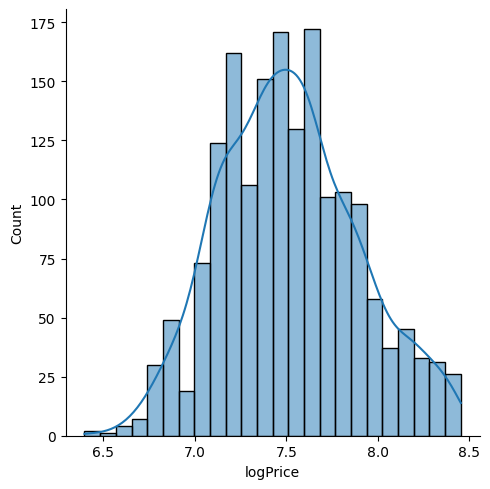

In [16]:
sns.displot(df['logPrice'], kde=True)

In [17]:
features = [
    "floor",
    "propertyType",
    "size",
    "rooms",
    "bathrooms",
    "address",
    "province",
    "municipality",
    "district",
    "country",
    "neighborhood",
    "latitude",
    "longitude",
    "showAddress",
    "url",
    "description",
    "status",
    "newDevelopment",
    "hasLift",
    "topNewDevelopment",
    "topPlus",
    "hasParkingSpace",
    "isParkingSpaceIncludedInPrice",
]
targets = ["price", "logPrice", "formerPrice", "priceChange", "priceByArea"]

<Axes: >

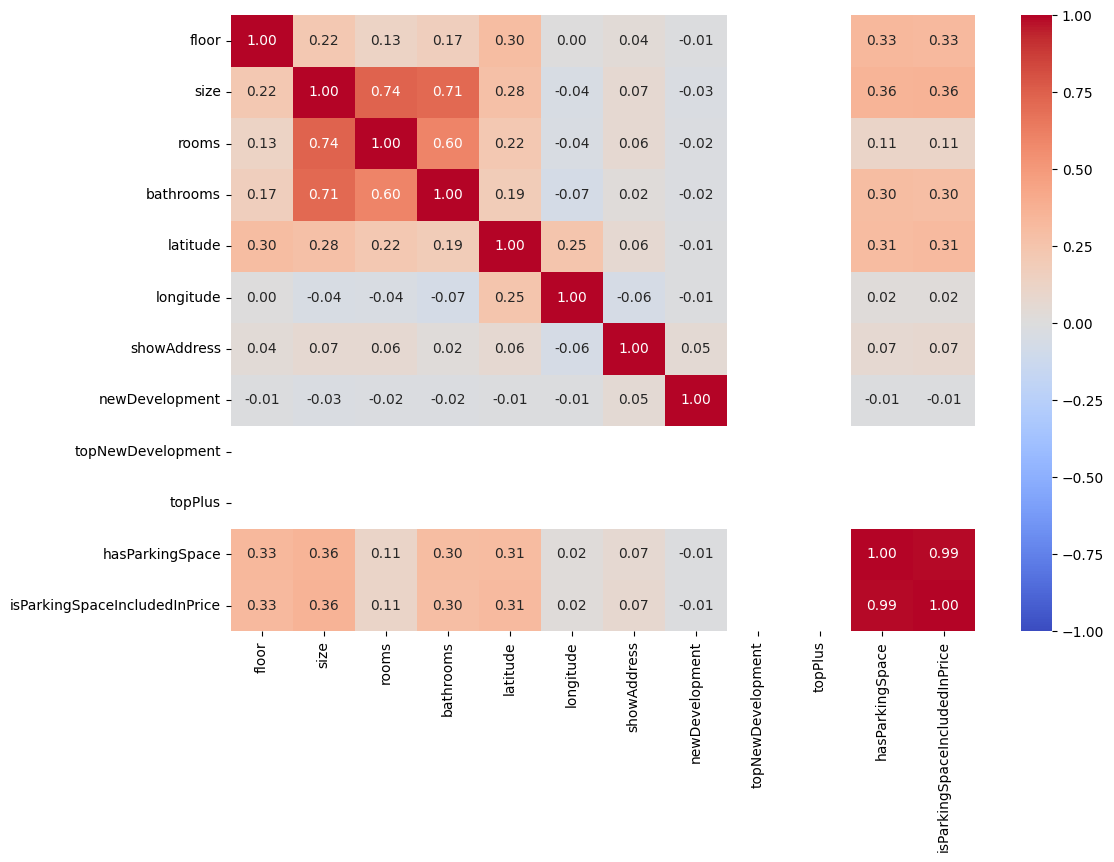

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmax=1, vmin=-1)

<Figure size 2000x1000 with 0 Axes>

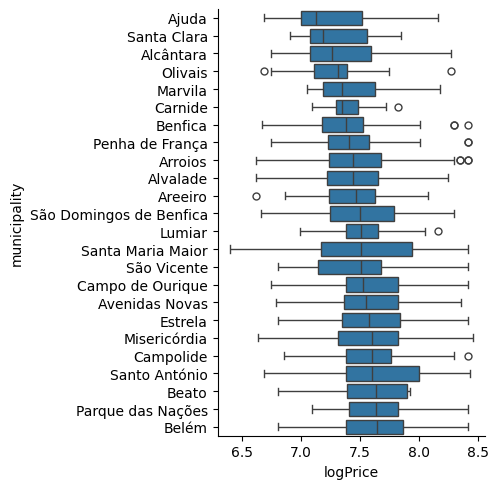

In [19]:
plt.figure(figsize=(20, 10))
sns.catplot(x='logPrice', y='municipality', data=df, kind='box', order=df.groupby('municipality')['logPrice'].median().sort_values().index)

/var/folders/p1/pg83r7j563x7sxbrchzbfc140000gn/T/ipykernel_35045/949298217.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipality_count_plot.set_xticklabels(municipality_count_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Santa Maria Maior'),
 Text(1, 0, 'Arroios'),
 Text(2, 0, 'Avenidas Novas'),
 Text(3, 0, 'Misericórdia'),
 Text(4, 0, 'Santo António'),
 Text(5, 0, 'Estrela'),
 Text(6, 0, 'Penha de França'),
 Text(7, 0, 'São Vicente'),
 Text(8, 0, 'São Domingos de Benfica'),
 Text(9, 0, 'Campolide'),
 Text(10, 0, 'Campo de Ourique'),
 Text(11, 0, 'Lumiar'),
 Text(12, 0, 'Alvalade'),
 Text(13, 0, 'Alcântara'),
 Text(14, 0, 'Parque das Nações'),
 Text(15, 0, 'Benfica'),
 Text(16, 0, 'Ajuda'),
 Text(17, 0, 'Belém'),
 Text(18, 0, 'Areeiro'),
 Text(19, 0, 'Marvila'),
 Text(20, 0, 'Olivais'),
 Text(21, 0, 'Carnide'),
 Text(22, 0, 'Beato'),
 Text(23, 0, 'Santa Clara')]

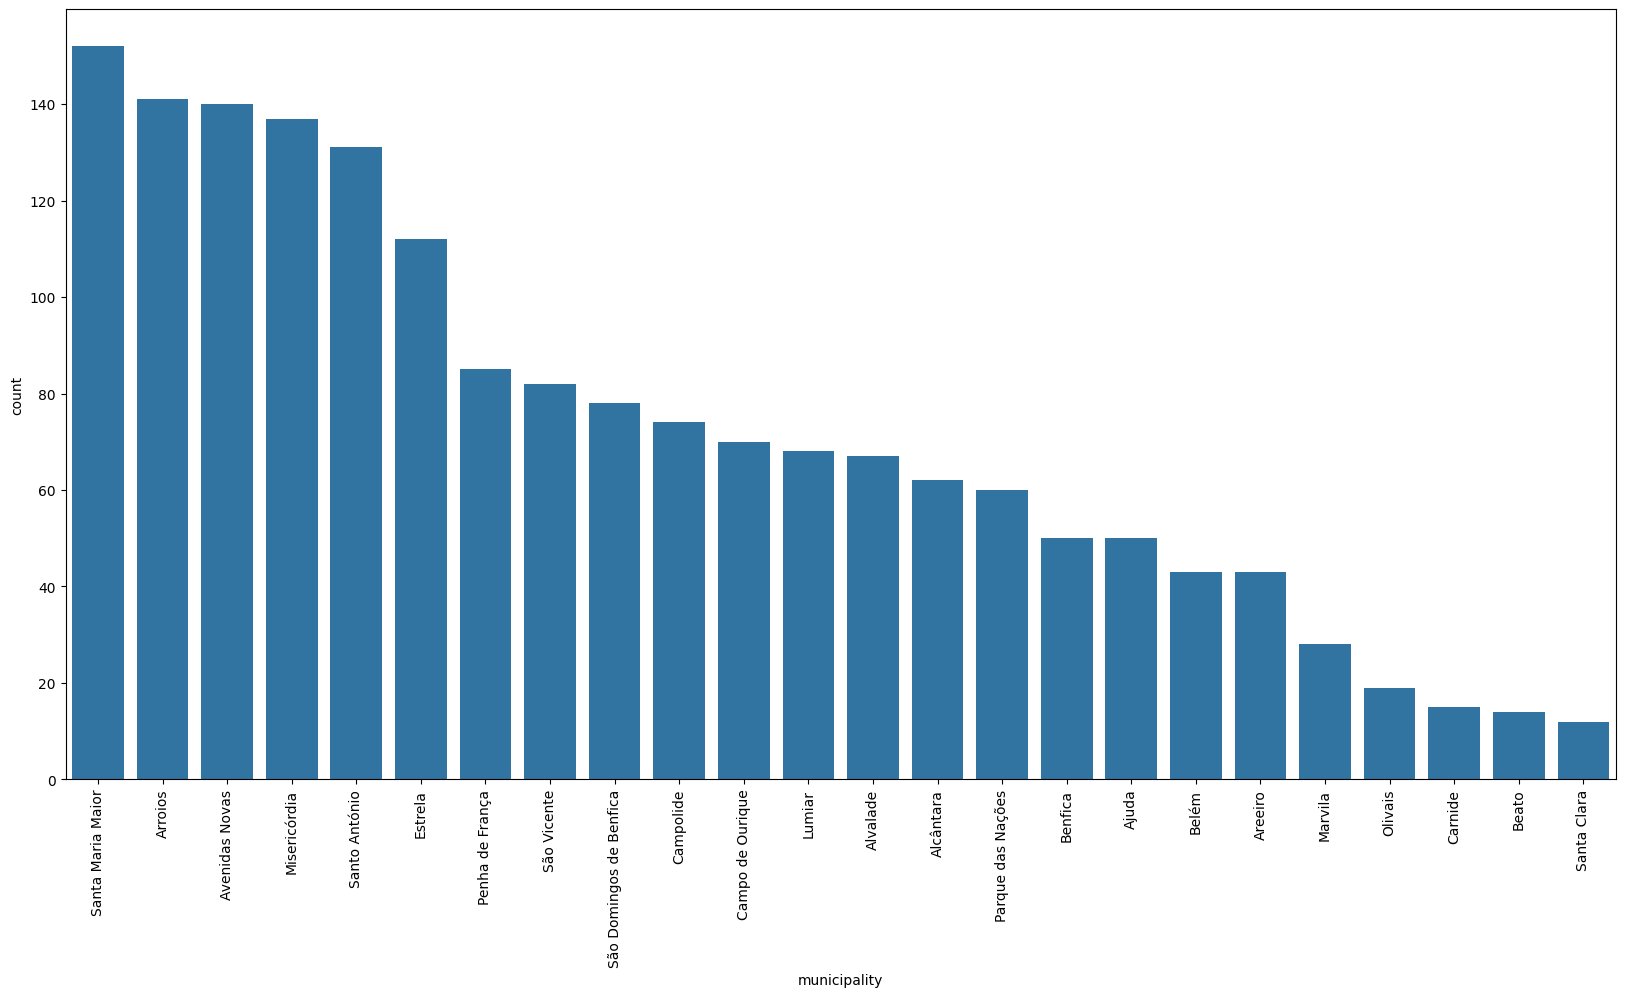

In [20]:
plt.figure(figsize=(20, 10))
municipality_count_plot = sns.countplot(
    x="municipality",
    data=df,
    order=df["municipality"].value_counts().index,
)
municipality_count_plot.set_xticklabels(municipality_count_plot.get_xticklabels(), rotation=90)

In [21]:
df

floor   price propertyType   size  rooms  bathrooms  \
propertyCode                                                        
33894210        NaN  1620.0         flat  153.0      5          2   
33513874        2.0  2700.0         flat  102.0      2          2   
33893664        NaN  1000.0         flat   55.0      1          1   
33893658        NaN  1000.0         flat   55.0      1          1   
33893592        NaN  1000.0         flat   55.0      1          1   
...             ...     ...          ...    ...    ...        ...   
33896858        8.0  2050.0         flat  103.0      2          2   
33896870        NaN  1600.0         flat   82.0      2          2   
33896861        NaN  1700.0         flat   70.0      2          1   
33896773        0.0  1850.0         flat  126.0      2          2   
33896459        2.0  2300.0         flat  140.0      4          2   

                                        address province       municipality  \
propertyCode                                                                  
33894210                      Saldanha - Picoas   Lisboa            Arroios   
33513874                      Doca de Alcântara   Lisboa            Estrela   
33893664                                   Bica   Lisboa       Misericórdia   
33893658                                   Bica   Lisboa       Misericórdia   
33893592                                   Bica   Lisboa       Misericórdia   
...                                         ...      ...                ...   
33896858                avenida Dom João II, 53   Lisboa  Parque das Nações   
33896870             rua Professor Prado Coelho   Lisboa             Lumiar   
33896861           rua António Pereira Carrilho   Lisboa            Arroios   
33896773      avenida David Mourão-Ferreira, 28   Lisboa             Lumiar   
33896459                 rua Rodrigo da Fonseca   Lisboa      Santo António   

                                                       district  ... hasLift  \
propertyCode                                                     ...           
33894210                                   São Jorge de Arroios  ...   False   
33513874                                      Doca de Alcântara  ...    True   
33893664                                                   Bica  ...   False   
33893658                                                   Bica  ...   False   
33893592                                                   Bica  ...   False   
...                                                         ...  ...     ...   
33896858                                           Expo Central  ...    True   
33896870                                              Telheiras  ...    True   
33896861                                   São Jorge de Arroios  ...   False   
33896773      Alto do Lumiar - Quinta das Conchas - Quinta d...  ...    True   
33896459                                       Rato - Amoreiras  ...    True   

             priceByArea  topNewDevelopment  topPlus  newDevelopmentFinished  \
propertyCode                                                                   
33894210            11.0              False    False                     NaN   
33513874            26.0              False    False                     NaN   
33893664            18.0              False    False                     NaN   
33893658            18.0              False    False                     NaN   
33893592            18.0              False    False                     NaN   
...                  ...                ...      ...                     ...   
33896858            20.0              False    False                     NaN   
33896870            20.0              False    False                     NaN   
33896861            24.0              False    False                     NaN   
33896773            15.0              False    False                     NaN   
33896459            16.0              False    False                     NaN   

      

In [22]:
# Step 1: Extract relevant data for clustering
coords = df[['latitude', 'longitude']]

# Step 2: Reset the index ahead of the merge
df = df.reset_index()

# Step 3: Compute average price for each cluster
median_price_per_municipality = (
    df.groupby('municipality')['price'].median().rename("median_price_per_municipality")
)
df = df.merge(median_price_per_municipality, on='municipality', how='left', validate='many_to_one')

# After operations, set 'propertyCode' back as the index
df = df.set_index('propertyCode')

# Step 4: Create GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Step 5: Interactive map using Folium
m = folium.Map(location=[38.740, -9.150], zoom_start=12.2)  # Centered on Lisbon

# Create a colormap
num_clusters = df['municipality'].nunique()
colormap = plt.get_cmap('tab20', num_clusters)  # Use a colormap with distinct colors
normalize = colors.Normalize(vmin=0, vmax=num_clusters - 1)

# Get unique municipalities and map them to integers
municipality_mapping = {name: idx for idx, name in enumerate(df['municipality'].unique())}

# Map the 'municipality' column to integers
df['municipality_int'] = df['municipality'].map(municipality_mapping)

# Add clusters to the map
for _, row in df.iterrows():
    cluster = row['municipality_int']
    price = row['median_price_per_municipality']
    color = colors.rgb2hex(colormap(normalize(cluster)))  # Get color for the cluster

    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f"Cluster: {cluster}<br>Median Price: €{price:.2f}"
    ).add_to(m)

m

In [23]:
median_price_per_municipality

municipality
Ajuda                      1250.0
Alcântara                  1425.0
Alvalade                   1700.0
Areeiro                    1750.0
Arroios                    1700.0
Avenidas Novas             1900.0
Beato                      2075.0
Belém                      2083.0
Benfica                    1600.0
Campo de Ourique           1850.0
Campolide                  2000.0
Carnide                    1550.0
Estrela                    1950.0
Lumiar                     1815.0
Marvila                    1550.0
Misericórdia               2000.0
Olivais                    1500.0
Parque das Nações          2075.0
Penha de França            1650.0
Santa Clara                1325.0
Santa Maria Maior          1820.0
Santo António              2000.0
São Domingos de Benfica    1800.0
São Vicente                1825.0
Name: median_price_per_municipality, dtype: float64

In [24]:
df

floor   price propertyType   size  rooms  bathrooms  \
propertyCode                                                        
33894210        NaN  1620.0         flat  153.0      5          2   
33513874        2.0  2700.0         flat  102.0      2          2   
33893664        NaN  1000.0         flat   55.0      1          1   
33893658        NaN  1000.0         flat   55.0      1          1   
33893592        NaN  1000.0         flat   55.0      1          1   
...             ...     ...          ...    ...    ...        ...   
33896858        8.0  2050.0         flat  103.0      2          2   
33896870        NaN  1600.0         flat   82.0      2          2   
33896861        NaN  1700.0         flat   70.0      2          1   
33896773        0.0  1850.0         flat  126.0      2          2   
33896459        2.0  2300.0         flat  140.0      4          2   

                                        address province       municipality  \
propertyCode                                                                  
33894210                      Saldanha - Picoas   Lisboa            Arroios   
33513874                      Doca de Alcântara   Lisboa            Estrela   
33893664                                   Bica   Lisboa       Misericórdia   
33893658                                   Bica   Lisboa       Misericórdia   
33893592                                   Bica   Lisboa       Misericórdia   
...                                         ...      ...                ...   
33896858                avenida Dom João II, 53   Lisboa  Parque das Nações   
33896870             rua Professor Prado Coelho   Lisboa             Lumiar   
33896861           rua António Pereira Carrilho   Lisboa            Arroios   
33896773      avenida David Mourão-Ferreira, 28   Lisboa             Lumiar   
33896459                 rua Rodrigo da Fonseca   Lisboa      Santo António   

                                                       district  ...  \
propertyCode                                                     ...   
33894210                                   São Jorge de Arroios  ...   
33513874                                      Doca de Alcântara  ...   
33893664                                                   Bica  ...   
33893658                                                   Bica  ...   
33893592                                                   Bica  ...   
...                                                         ...  ...   
33896858                                           Expo Central  ...   
33896870                                              Telheiras  ...   
33896861                                   São Jorge de Arroios  ...   
33896773      Alto do Lumiar - Quinta das Conchas - Quinta d...  ...   
33896459                                       Rato - Amoreiras  ...   

             topNewDevelopment topPlus  newDevelopmentFinished  formerPrice  \
propertyCode                                                                  
33894210                 False   False                     NaN       1620.0   
33513874                 False   False                     NaN       2700.0   
33893664                 False   False                     NaN       1000.0   
33893658                 False   False                     NaN       1000.0   
33893592                 False   False                     NaN       1000.0   
...                        ...     ...                     ...          ...   
33896858                 False   False                     NaN       2050.0   
33896870                 False   False                     NaN       1600.0   
33896861                 False   False                     NaN       1700.0   
33896773                 False   False                     NaN       1850.0   
33896459                 False   False                     NaN       2300.0   

              priceChange hasParkingSpace  isParkingSpaceIncludedInPrice  \
propertyCode                                   

In [25]:
df["municipality"].value_counts()

municipality
Santa Maria Maior          152
Arroios                    141
Avenidas Novas             140
Misericórdia               137
Santo António              131
Estrela                    112
Penha de França             85
São Vicente                 82
São Domingos de Benfica     78
Campolide                   74
Campo de Ourique            70
Lumiar                      68
Alvalade                    67
Alcântara                   62
Parque das Nações           60
Benfica                     50
Ajuda                       50
Belém                       43
Areeiro                     43
Marvila                     28
Olivais                     19
Carnide                     15
Beato                       14
Santa Clara                 12
Name: count, dtype: int64

In [26]:
global_median = df['logPrice'].median()

# Calculate median and count per municipality
agg = df.groupby('municipality')['logPrice'].agg(['median', 'count']).rename(columns={'median': 'municipality_median', 'count': 'sample_count'})

# Smoothing factor
alpha = 10

# Apply smoothing
agg['smoothed_median'] = (agg['sample_count'] * agg['municipality_median'] + alpha * global_median) / (agg['sample_count'] + alpha)

# Map smoothed median back to the main dataframe
df['municipality_encoded'] = df['municipality'].map(agg['smoothed_median'])

In [27]:
len(df['municipality'].unique()) == len(df['municipality_encoded'].unique())

True

In [28]:
agg.sort_values('smoothed_median')

municipality_median  sample_count  smoothed_median
municipality                                                               
Ajuda                               7.130899            50         7.191673
Alcântara                           7.261773            62         7.294241
Santa Clara                         7.188990            12         7.328332
Olivais                             7.313220            19         7.376090
Marvila                             7.346010            28         7.385361
Benfica                             7.377759            50         7.397389
Carnide                             7.346010            15         7.405823
Penha de França                     7.408531            85         7.417690
Arroios                             7.438384           141         7.442169
Alvalade                            7.438384            67         7.445807
Areeiro                             7.467371            43         7.472686
São Domingos de Benfica             7.495542            78         7.495542
Lumiar                              7.503807            68         7.502747
Santa Maria Maior                   7.506531           152         7.505853
São Vicente                         7.509241            82         7.507752
Campo de Ourique                    7.522941            70         7.519516
Avenidas Novas                      7.549609           140         7.546005
Estrela                             7.575585           112         7.569024
Beato                               7.635899            14         7.577417
Campolide                           7.600902            74         7.588360
Santo António                       7.600902           131         7.593430
Misericórdia                        7.600902           137         7.593735
Belém                               7.641564            43         7.614013
Parque das Nações                   7.637644            60         7.617344

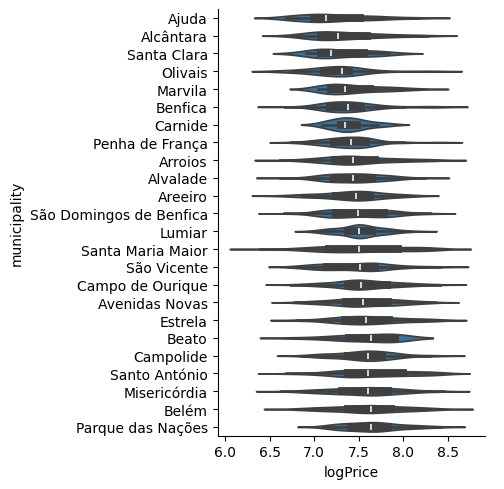

In [29]:
sns.catplot(x='logPrice', y='municipality', data=df, kind='violin', order=agg.sort_values('smoothed_median').index)

In [30]:
df.columns

Index(['floor', 'price', 'propertyType', 'size', 'rooms', 'bathrooms',
       'address', 'province', 'municipality', 'district', 'country',
       'neighborhood', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'status', 'newDevelopment', 'hasLift',
       'priceByArea', 'topNewDevelopment', 'topPlus', 'newDevelopmentFinished',
       'formerPrice', 'priceChange', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'logPrice',
       'median_price_per_municipality', 'municipality_int',
       'municipality_encoded'],
      dtype='object')

In [31]:
features = [
    "propertyType",
    "size",
    "rooms",
    "bathrooms",
    "municipality",
    "latitude",
    "longitude",
    "status",
    "newDevelopment",
    "hasLift",
    "hasParkingSpace",
]
targets = ["price", "logPrice"]

In [32]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 33894210 to 33896459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyType     1733 non-null   object 
 1   size             1733 non-null   float64
 2   rooms            1733 non-null   int64  
 3   bathrooms        1733 non-null   int64  
 4   municipality     1733 non-null   object 
 5   latitude         1733 non-null   float64
 6   longitude        1733 non-null   float64
 7   status           1732 non-null   object 
 8   newDevelopment   1733 non-null   bool   
 9   hasLift          1555 non-null   object 
 10  hasParkingSpace  1733 non-null   bool   
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 138.8+ KB


In [33]:
df.status.value_counts()

status
good     1729
renew       3
Name: count, dtype: int64

In [34]:
df = df.dropna(subset='status')

In [35]:
df.hasLift.astype(bool)
df = df.fillna(value={'hasLift': False})

/var/folders/p1/pg83r7j563x7sxbrchzbfc140000gn/T/ipykernel_35045/1519646761.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(value={'hasLift': False})


In [36]:
def encode_categorical(df, features, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    features = [feature for feature in features if feature != column] + list(dummies.columns)
    return df, features

In [37]:
df, features = encode_categorical(df, features, 'propertyType')
df, features = encode_categorical(df, features, 'status')

In [38]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [39]:
df[features+targets].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 33894210 to 33896459
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   size                    1732 non-null   float64
 1   rooms                   1732 non-null   int64  
 2   bathrooms               1732 non-null   int64  
 3   municipality            1732 non-null   object 
 4   latitude                1732 non-null   float64
 5   longitude               1732 non-null   float64
 6   newDevelopment          1732 non-null   int64  
 7   hasLift                 1732 non-null   int64  
 8   hasParkingSpace         1732 non-null   int64  
 9   propertyType_chalet     1732 non-null   int64  
 10  propertyType_duplex     1732 non-null   int64  
 11  propertyType_flat       1732 non-null   int64  
 12  propertyType_penthouse  1732 non-null   int64  
 13  propertyType_studio     1732 non-null   int64  
 14  status_good             1732 non-n

In [40]:
def drop_single_value_columns(df, features):
    for feature in features:
        if len(df[feature].unique()) == 1:
            df = df.drop(feature, axis=1)
            features.remove(feature)
    return df, features

In [41]:
df, features = drop_single_value_columns(df, features)

In [42]:
features

['size',
 'rooms',
 'bathrooms',
 'municipality',
 'latitude',
 'longitude',
 'hasLift',
 'hasParkingSpace',
 'propertyType_chalet',
 'propertyType_duplex',
 'propertyType_flat',
 'propertyType_penthouse',
 'propertyType_studio',
 'status_good',
 'status_renew']

<Axes: >

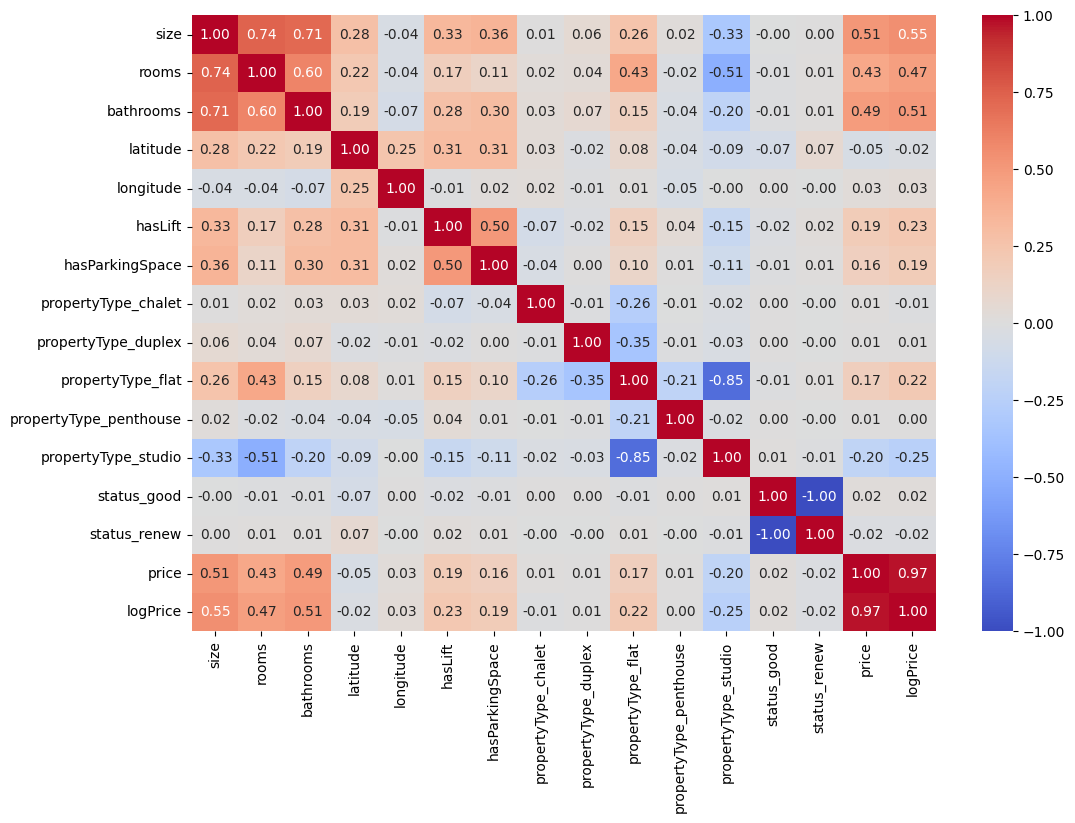

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + targets].corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmax=1, vmin=-1)

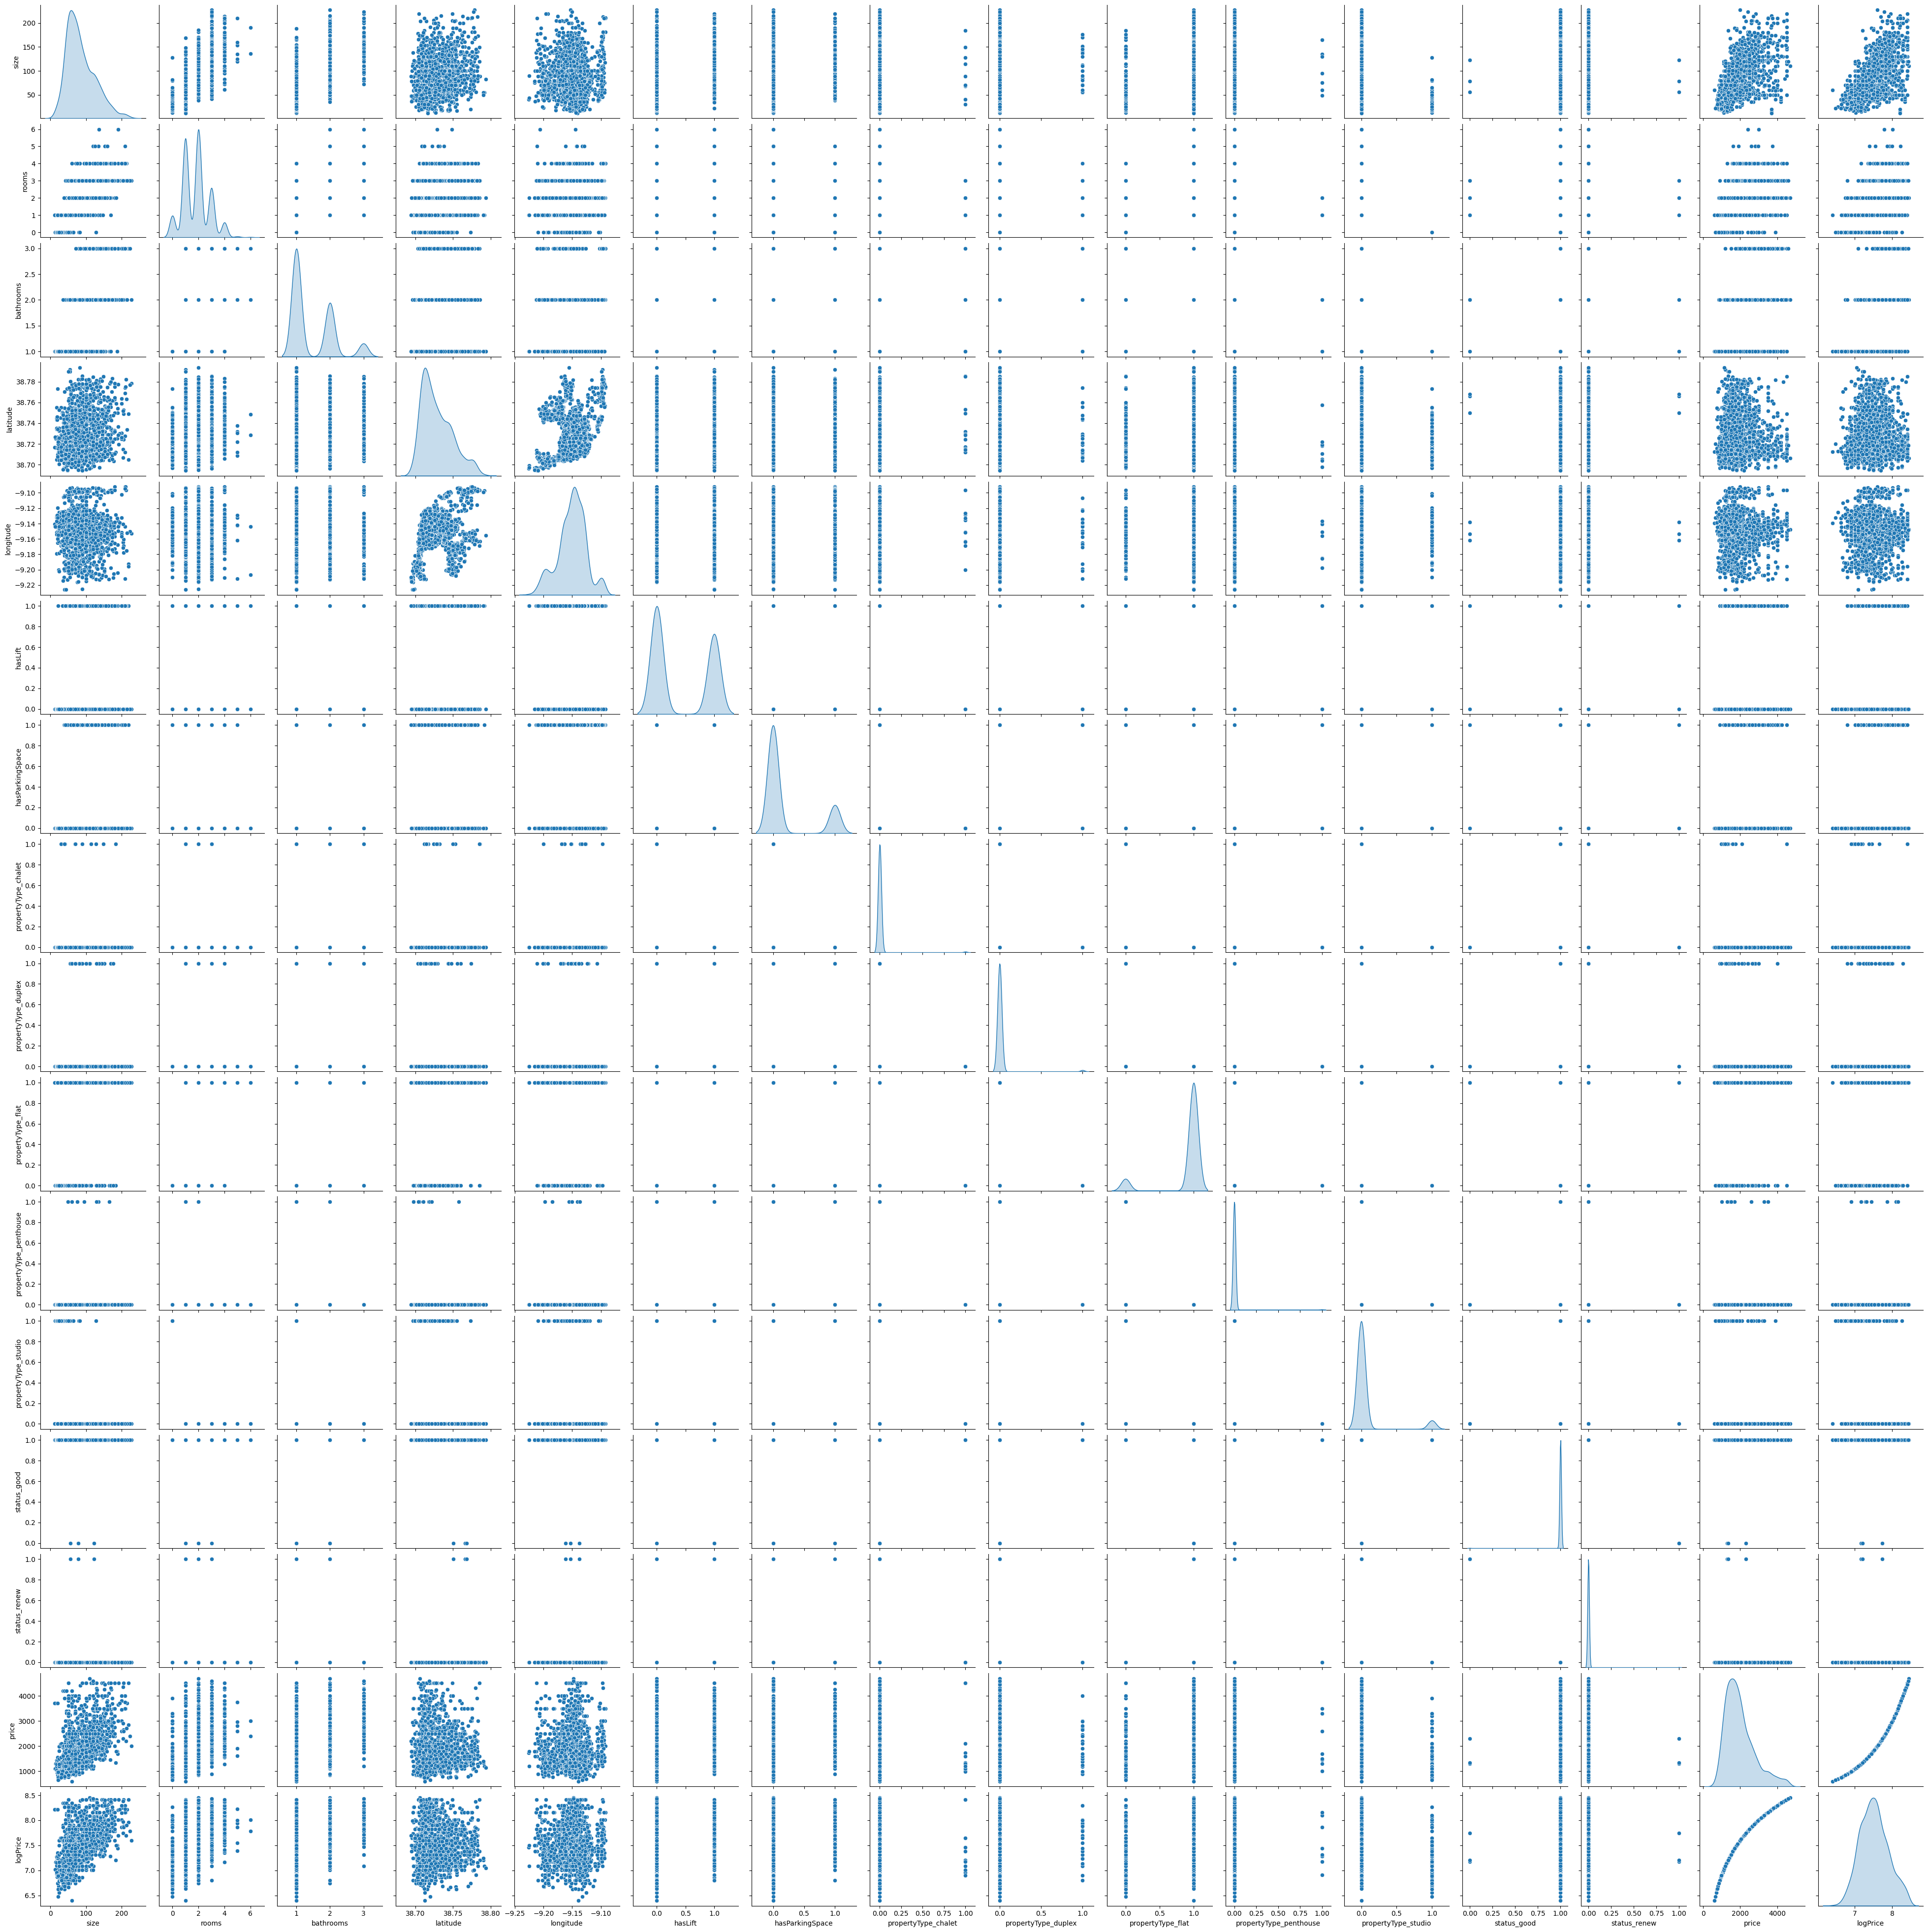

In [44]:
sns.pairplot(df[features + targets], diag_kind='kde')

In [45]:
X = df[features]
y = df[targets]

In [46]:
X

size  rooms  bathrooms       municipality   latitude  \
propertyCode                                                          
33894210      153.0      5          2            Arroios  38.731805   
33513874      102.0      2          2            Estrela  38.710724   
33893664       55.0      1          1       Misericórdia  38.709215   
33893658       55.0      1          1       Misericórdia  38.710570   
33893592       55.0      1          1       Misericórdia  38.708931   
...             ...    ...        ...                ...        ...   
33896858      103.0      2          2  Parque das Nações  38.773993   
33896870       82.0      2          2             Lumiar  38.764828   
33896861       70.0      2          1            Arroios  38.734024   
33896773      126.0      2          2             Lumiar  38.778774   
33896459      140.0      4          2      Santo António  38.721649   

              longitude  hasLift  hasParkingSpace  propertyType_chalet  \
propertyCode                                                             
33894210      -9.142860        0                0                    0   
33513874      -9.171262        1                0                    0   
33893664      -9.145189        0                0                    0   
33893658      -9.145689        0                0                    0   
33893592      -9.144717        0                0                    0   
...                 ...      ...              ...                  ...   
33896858      -9.097650        1                1                    0   
33896870      -9.171081        1                0                    0   
33896861      -9.137637        0                0                    0   
33896773      -9.153564        1                1                    0   
33896459      -9.154875        1                0                    0   

              propertyType_duplex  propertyType_flat  propertyType_penthouse  \
propertyCode                                                                   
33894210                        0                  1                       0   
33513874                        0                  1                       0   
33893664                        0                  1                       0   
33893658                        0                  1                       0   
33893592                        0                  1                       0   
...                           ...                ...                     ...   
33896858                        0                  1                       0   
33896870                        0                  1                       0   
33896861                        0                  1                       0   
33896773                        0                  1                       0   
33896459                        0                  1                       0   

              propertyType_studio  status_good  status_renew  
propertyCode                                                  
33894210                        0            1             0  
33513874                        0            1             0  
33893664                        0            1             0  
33893658                        0            1             0  
33893592                        0            1             0  
...                           ...          ...           ...  
33896858                        0            1             0  
33896870                        0            1             0  
33896861                        0            1             0  
33896773                        0            1             0  
33896459                        0            1             0  

[1732 rows x 15 columns]

In [47]:
X.to_csv(f'../data/training/{date_or_unioned}-features-{operation_type}.csv', index=True)
y.to_csv(f'../data/training/{date_or_unioned}-targets-{operation_type}.csv', index=True)